In [4]:
# it is a subest of machine learning which is work based on artifiial neural network(ANN). ann use to learn the hidden pattern and relationships in the dataset, required large amount of dataset(volume of dataset increase ,accuracy also increased while in  ML vlume high then its accuracy low)
# in ANN there are three layers:-  input,hidden,output layer
# input layer---> responsible for take i/p to the environment
# output---> genrate output through input 
# hidden---> process the input. hidden layer can be [n] (multiple)
# no. of neuron are equal to the no. of input / hidden/ ouput node (ex:->if there are 3 input nodes then no. of neuron is 3)
# each and every input is pass to the each and every hidden node it is called fully connected
# training of ANN is divide into two parts--> forward or backward
# Z= x1*w1+x2*w2+x3*w3+b      { w---> weight,b--->bias initially both are random, z--> activation }

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow  as tf



In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
df[' self_employed'].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
col_name=['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status']

In [13]:
# col=[]
# for i in col_name:
#     data=i.strip()
#     col.append(data)
# col

df.columns=df.columns.str.strip()

In [14]:
df['education'].value_counts().keys()


Index([' Graduate', ' Not Graduate'], dtype='object', name='education')

In [15]:
df['loan_status'].value_counts().keys()

Index([' Approved', ' Rejected'], dtype='object', name='loan_status')

In [16]:
cat_columns=['education','self_employed','loan_status']
for i in cat_columns:
    df[i]=df[i].str.strip()
    
    

In [17]:
df['education'].value_counts().keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [18]:
df['loan_status'].value_counts().keys()

Index(['Approved', 'Rejected'], dtype='object', name='loan_status')

In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
clean_data=pd.get_dummies(df,drop_first="if_binary").astype(int)    # onehot encoding and remove uneccasry columns

In [21]:
clean_data.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [22]:
x=clean_data.drop('loan_status_Rejected',axis='columns')
y=clean_data[['loan_status_Rejected']]

In [23]:
x.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [24]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


In [25]:
# for training ANN data we need to scalar data

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_transform=std.fit_transform(x)      # No outliers

In [26]:
# train or test
from sklearn.model_selection import train_test_split

In [27]:
x_transform.shape

(4269, 12)

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x_transform,y,test_size=0.15)

In [29]:
from tensorflow.keras.layers import Dense   # hidden layer
from tensorflow.keras.models import Sequential


In [30]:
x_train.shape[1]

12

##### input_dim=>   no of neuron = no of x variable 

In [31]:
ann_model=Sequential()

ann_model.add(Dense(units=68,activation='relu',input_dim=x_train.shape[1]))
ann_model.add(Dense(units=45,activation='relu'))  # no need of input because there are hidden layer is work as an input layer and activation used -- relu on hidden layer
ann_model.add(Dense(units=28,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))  # for output layer and use single neuron (units=1). in last it genrate single output after taking no. of inputs. in this binaryclassification is used. or sigmoid is used bcoz there are binaryclassification problem statements

# if problem statment is binary classification(yes/No) then nauron is single . if no. of classes more than two(multiclass classification) then neuron are no. of classes. ex-> classes are three then no of neuron are 3. 
# if there are multiclass classification in that problem statement we used softmax in activation function on output layer
# if problem statement is linear(regression) 

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
ann_model.compile(loss="binary_crossentropy",optimizer="adam")
ann_model.summary()

# loss function:- can be more (classification or regression)

# in classification there are loss func are :->  log loss, binary_crossentropy, catgorical_crossentropy, sparse_catgorical_crossentropy

# in regression loss func are----->>>>>   MSE, MAE
# logg loss or binary_cross both are same 

# if problem statement is binaryclassification then binary_crossentropy used or multiclassification then used catgoricalcrossentrop or sparse (dono me s ek)

# for reduce the loss back propogation is used 
# optimizers reduce the weight and bias  
# types of optimizers--> stoch,SGD, Adam, Adamax(these two are new optimizers)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           884 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         3,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,306 (20.73 KB)

 Trainable params: 5,306 (20.73 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# for calculate score:-- use metrices=['accuracy']
ann_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [36]:
#train the model
history=ann_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
# validatation data== test data(loss or accuracy calculate on test data as well as train data .  bydefault calculate on train data so we give validation data to check loss or accuracy on test data)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7186 - loss: 0.5361 - val_accuracy: 0.9111 - val_loss: 0.2502
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.2229 - val_accuracy: 0.9095 - val_loss: 0.2158
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9290 - loss: 0.1869 - val_accuracy: 0.9236 - val_loss: 0.1621
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.1500 - val_accuracy: 0.9345 - val_loss: 0.1469
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9558 - loss: 0.1192 - val_accuracy: 0.9392 - val_loss: 0.1349
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9615 - loss: 0.1104 - val_accuracy: 0.9438 - val_loss: 0.1346
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9647 - loss: 0.1036 - val_accuracy: 0.9501 - val_loss: 0.1196
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9701 - loss: 0.0901 - val_accuracy: 0.

In [37]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.813947,0.411265,0.911076,0.250174
1,0.925028,0.207639,0.909516,0.215830
2,0.933021,0.174547,0.923557,0.162136
3,0.944598,0.150315,0.934477,0.146914
4,0.949835,0.133832,0.939158,0.134946
5,0.955899,0.120358,0.943838,0.134630
6,0.961963,0.108895,0.950078,0.119593
7,0.966373,0.098713,0.954758,0.111211
8,0.964994,0.095109,0.950078,0.118512
9,0.972988,0.083915,0.948518,0.118396


<Axes: >

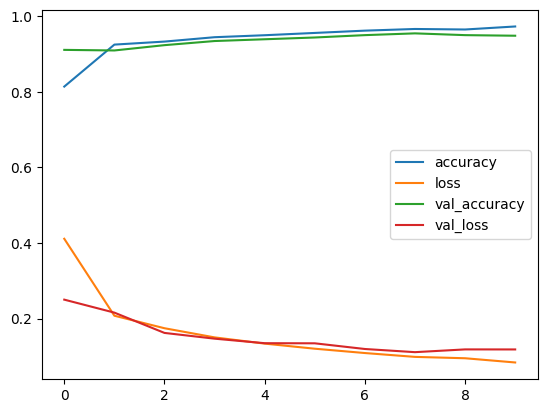

In [38]:
pd.DataFrame(history.history).plot()

In [39]:
# prediction---
pred=ann_model.predict(x_test)
pred        # 2d array

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[9.27385528e-08],
       [8.28855276e-01],
       [6.17203023e-03],
       [3.83818269e-01],
       [4.63909050e-03],
       [9.33663189e-01],
       [7.66864261e-08],
       [9.58532929e-01],
       [9.99999166e-01],
       [5.69606309e-05],
       [1.15529383e-02],
       [6.54874086e-01],
       [6.12246871e-01],
       [9.98256147e-01],
       [6.58754686e-08],
       [8.49908233e-01],
       [1.92584991e-01],
       [9.56302404e-01],
       [9.55709279e-01],
       [2.15047738e-03],
       [9.99927819e-01],
       [9.99996305e-01],
       [2.29589015e-04],
       [9.99947190e-01],
       [9.99563694e-01],
       [3.36394482e-03],
       [9.64494705e-01],
       [9.56132951e-11],
       [8.29964995e-01],
       [5.65320488e-06],
       [9.97009337e-01],
       [9.99983370e-01],
       [9.99904573e-01],
       [3.28130409e-05],
       [8.93504143e-01],
       [2.83822149e-01],
       [9.99999106e-01],
       [9.53123331e-01],
       [9.99971688e-01],
       [1.64667368e-01],


In [40]:
x_test.shape

(641, 12)

In [41]:
pred.shape          #(641,1)

(641, 1)

In [42]:
prediction=(pred>0.5).astype(int).ravel()    # probabilities 
# if probabilities>0.5:
#     1
# else:
#     0

In [43]:
prediction.shape

(641,)

In [44]:
y_test['prediction']=prediction

In [45]:
y_test.head()

,loan_status_Rejected,prediction
2178,0,0
3983,1,1
2191,0,0
1163,0,0
2228,0,0


In [ ]:
# create confusion matrices, classification report 

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
matrix=confusion_matrix(y_test['loan_status_Rejected'],y_test['prediction'])   # (actual, prediction)
matrix

array([[376,  24],
       [  9, 232]], dtype=int64)

In [51]:
print(classification_report(y_test['loan_status_Rejected'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       400
           1       0.91      0.96      0.93       241

    accuracy                           0.95       641
   macro avg       0.94      0.95      0.95       641
weighted avg       0.95      0.95      0.95       641



In [52]:
ann_model.save('loan_approval_model.h5')  # save--> built-in func h5 is extansion of tensorflow